In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from ipywidgets import interact, FloatSlider
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.rcParams['lines.color'] = 'black'
plt.rcParams['lines.linewidth'] = 1

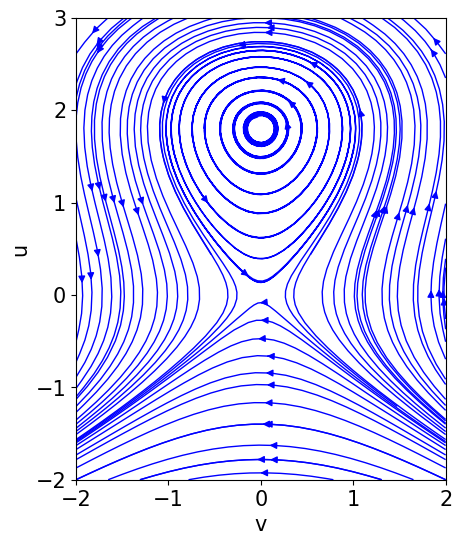

In [2]:
# BBM equation
fig, axes = plt.subplots(1,1,figsize=(6,6))

c = 0.9
alpha=0

u = np.linspace(-2, 3, 500)
v = np.linspace(-2, 2., 501)

V, U = np.meshgrid(v, u)
du = V
dv = U - 0.5*U**2/c + alpha/c

axes.streamplot(V,U,dv,du,broken_streamlines=False,density=0.8,color='b')
axes.set_xlabel('v'); axes.set_ylabel('u');
#axes.plot([0,0],[c+np.sqrt(c**2+2*alpha),c-np.sqrt(c**2+2*alpha)],'ok')
plt.axis('image');

def rhs(t,y):
    u, v = y
    return np.array([v, u - 0.5 * u**2 / c + alpha / c])

xmax = 30.
u0=0.01
y0 = np.array([u0,0.001])
t_eval = np.linspace(0,xmax,1000)
forwardsoln = scipy.integrate.solve_ivp(rhs,[0,xmax],y0,t_eval=t_eval,atol=1.e-12,rtol=1.e-12)
u = forwardsoln.y[0,:]
x = forwardsoln.t
#vv = np.diff(u)/np.diff(x)*(1+tau*c*(u[1:]-c))
#axes.plot(vv,u[1:],'-r',lw=3)

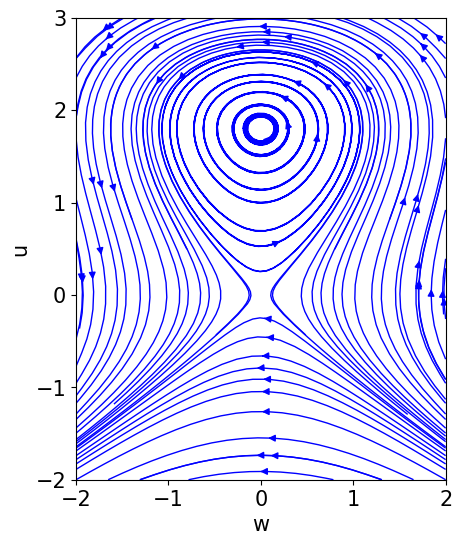

In [3]:
# BBMH system
fig, axes = plt.subplots(1,1,figsize=(6,6))

c = 0.9
tau = 0.1
alpha=0

u = np.linspace(-2, 3., 500)
w = np.linspace(-2, 2., 501)

W, U = np.meshgrid(w, u)
du = W/(1+c*tau*(U-c))
dw = (0.5*U**2-c*U-alpha)/(tau-c)

axes.streamplot(W,U,dw,du,broken_streamlines=False,density=0.8,color='b')
axes.set_xlabel('w'); axes.set_ylabel('u');
#axes.plot([0,0],[c+np.sqrt(c**2+2*alpha),c-np.sqrt(c**2+2*alpha)],'ok')
plt.axis('image');

def rhs(t,y):
    u, w = y
    return np.array([w/(1+c*tau*(u-c)), (0.5*u**2-c*u-alpha)/(tau-c)])

xmax = 30.
u0=0.01
y0 = np.array([u0,0.001])
t_eval = np.linspace(0,xmax,1000)
forwardsoln = scipy.integrate.solve_ivp(rhs,[0,xmax],y0,t_eval=t_eval,atol=1.e-12,rtol=1.e-12)
u = forwardsoln.y[0,:]
x = forwardsoln.t
#vv = np.diff(u)/np.diff(x)*(1+tau*c*(u[1:]-c))
#axes.plot(vv,u[1:],'-r',lw=3)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.close()

def viscous_shock(c=1.5,tau=0.2,u0=0.49,xmax=30.):

    alpha = 0.
    axes[0].cla()
    axes[1].cla()

    u = np.linspace(-2, 3., 500)
    w = np.linspace(-2, 2., 501)

    W, U = np.meshgrid(w, u)
    du = W/(1+c*tau*(U-c))
    dw = (0.5*U**2-c*U-alpha)/(tau-c)

    stream = axes[0].streamplot(W,U,dw,du,broken_streamlines=False,density=0.8,color='b')
    axes[0].set_xlabel('w'); axes[0].set_ylabel('u');
    axes[0].plot([0,0],[c+np.sqrt(c**2+2*alpha),c-np.sqrt(c**2+2*alpha)],'ok')
    axes[0].axis('image')


    def rhs(t,y):
        u, w = y
        return np.array([w/(1+c*tau*(u-c)), (0.5*u**2-c*u-alpha)/(tau-c)])

    y0 = np.array([u0,0.001])
    t_eval = np.linspace(0,xmax,1000)
    forwardsoln = scipy.integrate.solve_ivp(rhs,[0,xmax],y0,t_eval=t_eval,atol=1.e-12,rtol=1.e-12)
    u = forwardsoln.y[0,:]
    x = forwardsoln.t
    axes[1].plot(x,u,'-r',lw=3)
    ww = np.diff(u)/np.diff(x)*(1+tau*c*(u[1:]-c))
    axes[0].plot(ww,u[1:],'-r',lw=3)
    axes[1].set_xlim(0,xmax)
    axes[1].set_ylim(-1,3)

    fig.canvas.draw_idle()
    plt.close()
    return fig

interact(viscous_shock,u0=FloatSlider(min=-0.1,max=2.0,step=0.01,value=0.01),
                        tau=FloatSlider(min=0.01,max=2.0,step=0.01,value=0.2));

# Plotting

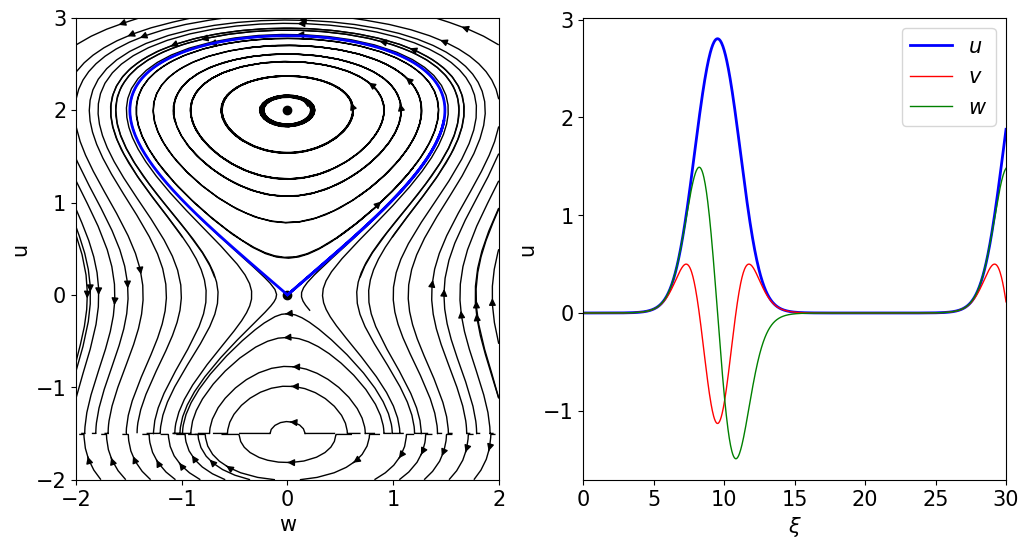

In [4]:
def plot_traveling_wave(c,tau,u0,xmax,v0=0.001,alpha=0,umax=3.,lw=2,plot_gradients=False,plot_sqrtsech=False,plot_vw=True):
    fig, axes = plt.subplots(1,2,figsize=(12,6))

    u = np.linspace(-2, umax, 500)
    w = np.linspace(-2, 2., 501)

    W, U = np.meshgrid(w, u)
    du = W/(1+c*tau*(U-c))
    dw = (0.5*U**2-c*U-alpha)/(tau-c)

    stream = axes[0].streamplot(W,U,dw,du,broken_streamlines=False,density=0.6,color='k')
    axes[0].set_xlabel('w'); axes[0].set_ylabel('u');
    axes[0].plot([0,0],[c+np.sqrt(c**2+2*alpha),c-np.sqrt(c**2+2*alpha)],'ok')
    #plt.axis('image');

    def rhs(t,y):
        u, w = y
        return np.array([w/(1+c*tau*(u-c)), (0.5*u**2-c*u-alpha)/(tau-c)])

    y0 = np.array([u0,0.00001])
    t_eval = np.linspace(0,xmax,1000)
    forwardsoln = scipy.integrate.solve_ivp(rhs,[0,xmax],y0,t_eval=t_eval,atol=1.e-12,rtol=1.e-12)
    u = forwardsoln.y[0,:]
    x = forwardsoln.t
    w = forwardsoln.y[1,:]
    v = u*(c-u/2)
    axes[0].plot(w,u[:],'-b',lw=lw)

    if plot_sqrtsech:
        offset = plot_sqrtsech
        x = x-offset

    axes[1].plot(x,u,'-b',lw=lw,label=r"$u$")
    axes[1].set_xlim(0,xmax)
    #axes[1].set_ylim(-1,5)
    axes[1].set_xlabel(r"$\xi$"); axes[1].set_ylabel(r"u");

    if plot_vw:
        axes[1].plot(x,v,'-r',lw=1,label=r"$v$")
        axes[1].plot(x,w,'-g',lw=1,label=r"$w$")


    if plot_gradients:
        axes[1].plot(x,(1+c*tau)*np.gradient(v,x),'--r',lw=1)
        axes[1].plot(x,np.gradient(u,x)-c*tau*np.gradient(w,x),'--g',lw=1)

    if plot_sqrtsech:
        axes[1].plot(x,(5/3)/np.cosh((5/3)*x)**0.5-1,"--k",lw=2,label=r"$\sqrt{1/\cosh}$")
        axes[1].set_xlim(-offset,xmax-offset)

    axes[1].legend()

    return fig

fig = plot_traveling_wave(1.0,2./5,0.00001,30.)
plt.savefig("normal_solitary_wave.pdf",bbox_inches='tight')

## Plot for the paper

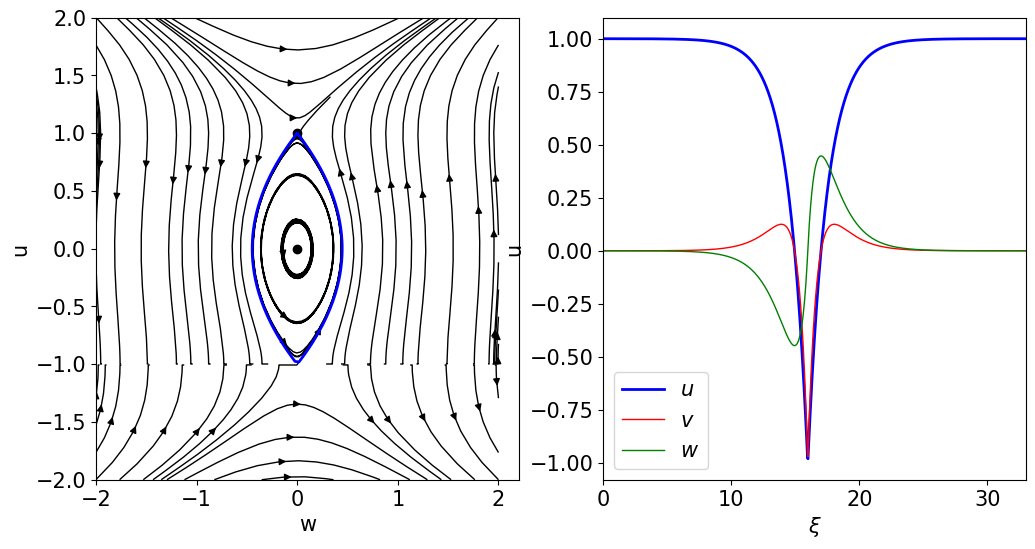

In [5]:
c = 2.
tau = 1.
fig = plot_traveling_wave(c=0.5,tau=4/3.,u0=0.9999,xmax=33,umax=2.0)
plt.savefig("peakon.pdf",bbox_inches='tight')

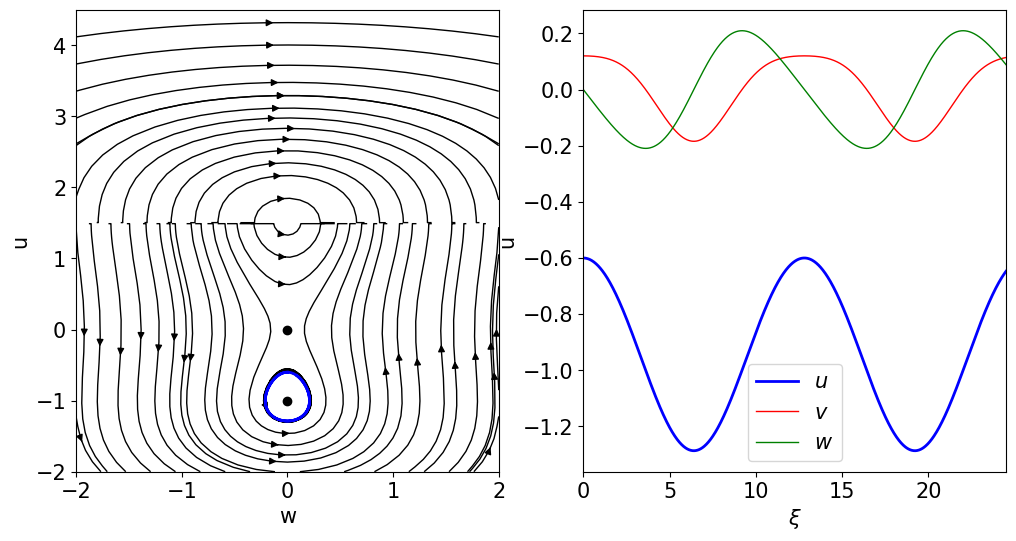

In [6]:
fig = plot_traveling_wave(c=-0.5,tau=1.,u0=-0.6,xmax=24.5,umax=4.5)

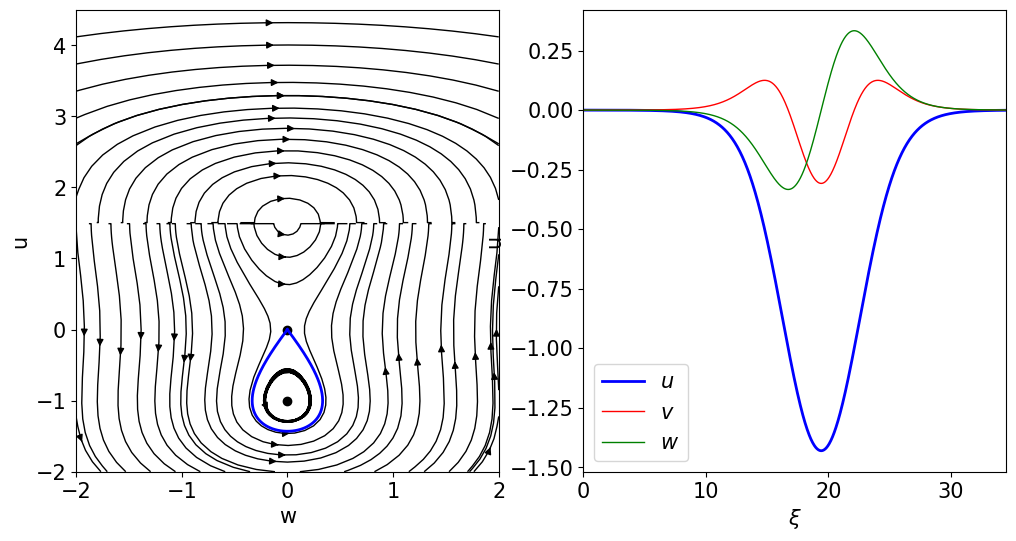

In [7]:
fig = plot_traveling_wave(c=-0.5,tau=1.,u0=-0.0001,xmax=34.5,umax=4.5)